In [1]:
library(rstan)
library(brms)

rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())

Loading required package: StanHeaders
Loading required package: ggplot2
rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
Loading required package: Rcpp
Loading 'brms' package (version 2.9.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').

Attaching package: ‘brms’

The following object is masked from ‘package:rstan’:

    loo



In [3]:
interaction_1  <- read.csv("https://raw.githubusercontent.com/logics-of-blue/book-r-stan-bayesian-model-intro/master/book-data/3-10-1-interaction-1.csv")
head(interaction_1)

sales,publicity,bargen
<dbl>,<fct>,<fct>
87.5,not,not
103.7,not,not
83.3,not,not
131.9,not,not
106.6,not,not
83.6,not,not


In [4]:
summary(interaction_1)

     sales              publicity           bargen  
 Min.   : 55.7   not         :50   not         :50  
 1st Qu.:108.8   to_implement:50   to_implement:50  
 Median :124.3                                      
 Mean   :127.2                                      
 3rd Qu.:148.5                                      
 Max.   :191.7                                      

In [5]:
model.matrix(sales ~ publicity + bargen + publicity:bargen, interaction_1)

(Intercept),publicityto_implement,bargento_implement,publicityto_implement:bargento_implement
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0


In [7]:
interaction_brms1 <- brm(
    formula = sales ~ publicity * bargen,
    family = gaussian(link = "identity"),
    data = interaction_1,
    seed = 1,
    prior = c(set_prior("", class = "Intercept"), set_prior("", class = "sigma"))
)
interaction_brms1

Compiling the C++ model
Start sampling


 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: sales ~ publicity * bargen 
   Data: interaction_1 (Number of observations: 100) 
Samples: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup samples = 4000

Population-Level Effects: 
                                         Estimate Est.Error l-95% CI u-95% CI
Intercept                                  103.36      3.64    96.16   110.51
publicityto_implement                        9.98      5.14    -0.15    20.26
bargento_implement                          27.25      5.16    17.18    37.56
publicityto_implement:bargento_implement    20.77      7.25     6.91    34.97
                                         Eff.Sample Rhat
Intercept                                      2649 1.00
publicityto_implement                          2048 1.00
bargento_implement                             2230 1.00
publicityto_implement:bargento_implement       1813 1.00

Family Specific Parameters: 
      

In [8]:
newdata_1 <- data.frame(
    publicity = rep(c("not", "to_implement"), 2),
    bargen = rep(c("not", "to_implement"), each = 2)
)
newdata_1

publicity,bargen
<fct>,<fct>
not,not
to_implement,not
not,to_implement
to_implement,to_implement


In [11]:
fitted(interaction_brms1, newdata_1)

Estimate,Est.Error,Q2.5,Q97.5
103.3564,3.636775,96.16094,110.5115
113.3385,3.778010,106.07613,120.8831
130.6088,3.717349,123.54125,138.0518
161.3628,3.715490,153.92889,168.5920


In [12]:
round(fitted(interaction_brms1, newdata_1))

Estimate,Est.Error,Q2.5,Q97.5
103,4,96,111
113,4,106,121
131,4,124,138
161,4,154,169


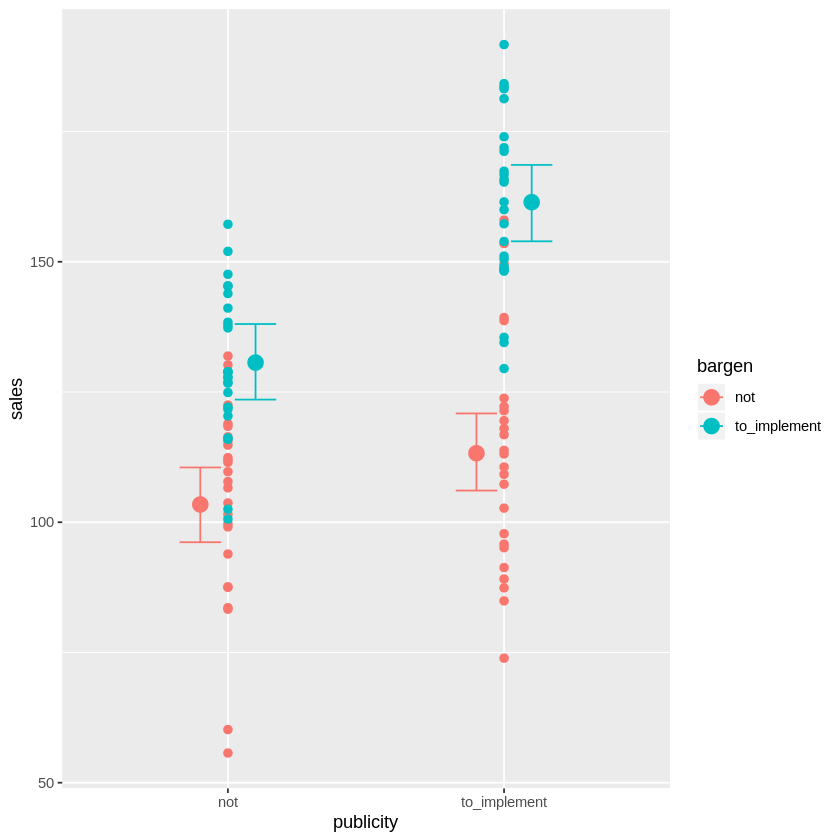

In [13]:
eff_1 <- marginal_effects(interaction_brms1, effects = "publicity:bargen")
plot(eff_1, points = T)

In [14]:
interaction_2  <- read.csv("https://raw.githubusercontent.com/logics-of-blue/book-r-stan-bayesian-model-intro/master/book-data/3-10-2-interaction-2.csv")
head(interaction_2)

sales,publicity,temperature
<dbl>,<fct>,<dbl>
74.0,not,8.0
60.2,not,11.2
91.2,not,17.2
81.8,not,27.2
90.9,not,6.1
143.6,not,27.0


In [15]:
summary(interaction_2)

     sales               publicity   temperature    
 Min.   : 25.90   not         :50   Min.   : 0.400  
 1st Qu.: 79.67   to_implement:50   1st Qu.: 9.725  
 Median :109.50                     Median :14.650  
 Mean   :123.47                     Mean   :15.539  
 3rd Qu.:154.45                     3rd Qu.:23.025  
 Max.   :263.30                     Max.   :29.800  

In [17]:
interaction_brms2 <- brm(
    formula = sales ~ publicity * temperature,
    family = gaussian(link = "identity"),
    data = interaction_2,
    seed = 1,
    prior = c(set_prior("", class = "Intercept"), set_prior("", class = "sigma"))
)
interaction_brms2

Compiling the C++ model
recompiling to avoid crashing R session
Start sampling


 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: sales ~ publicity * temperature 
   Data: interaction_2 (Number of observations: 100) 
Samples: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup samples = 4000

Population-Level Effects: 
                                  Estimate Est.Error l-95% CI u-95% CI
Intercept                            43.17      6.07    31.59    55.49
publicityto_implement                17.00      8.44     0.07    32.99
temperature                           2.58      0.34     1.88     3.23
publicityto_implement:temperature     4.21      0.49     3.27     5.20
                                  Eff.Sample Rhat
Intercept                               2081 1.00
publicityto_implement                   1981 1.00
temperature                             2057 1.00
publicityto_implement:temperature       1906 1.00

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Eff.Sample Rhat
sigma    18.

In [18]:
newdata2 <- data.frame(
    publicity = rep(c("not", "to_implement"), each = 2),
    temperature = rep(c(0, 10, 0, 10))
)
newdata2

publicity,temperature
<fct>,<dbl>
not,0
not,10
to_implement,0
to_implement,10


In [19]:
round(fitted(interaction_brms2, newdata2))

Estimate,Est.Error,Q2.5,Q97.5
43,6,32,55
69,3,62,76
60,6,49,72
128,3,122,134


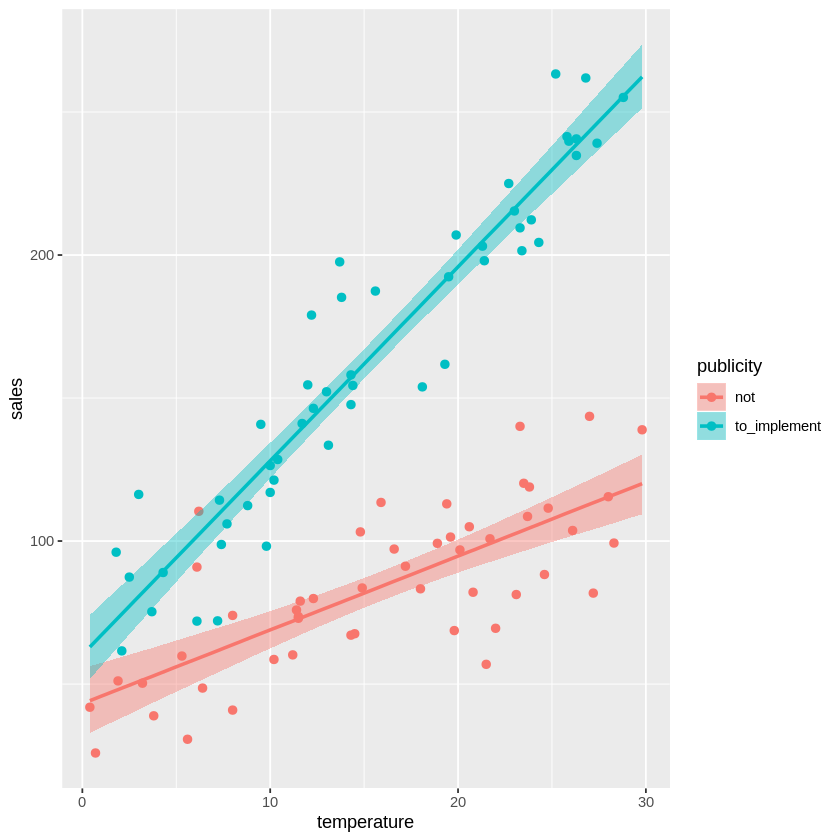

In [21]:
eff_2 <- marginal_effects(interaction_brms2, effects = "temperature:publicity")
plot(eff_2, points = T)

In [22]:
interaction_3  <- read.csv("https://raw.githubusercontent.com/logics-of-blue/book-r-stan-bayesian-model-intro/master/book-data/3-10-3-interaction-3.csv")
head(interaction_3)

sales,product,clerk
<dbl>,<int>,<int>
142.5,17,3
193.2,38,4
376.7,33,9
231.0,17,8
134.8,48,3
361.0,48,6


In [23]:
summary(interaction_3)

     sales          product          clerk     
 Min.   : 35.5   Min.   :10.00   Min.   :1.00  
 1st Qu.:116.7   1st Qu.:19.00   1st Qu.:3.00  
 Median :178.7   Median :28.00   Median :4.00  
 Mean   :204.0   Mean   :29.66   Mean   :4.86  
 3rd Qu.:280.6   3rd Qu.:41.00   3rd Qu.:7.00  
 Max.   :487.2   Max.   :50.00   Max.   :9.00  

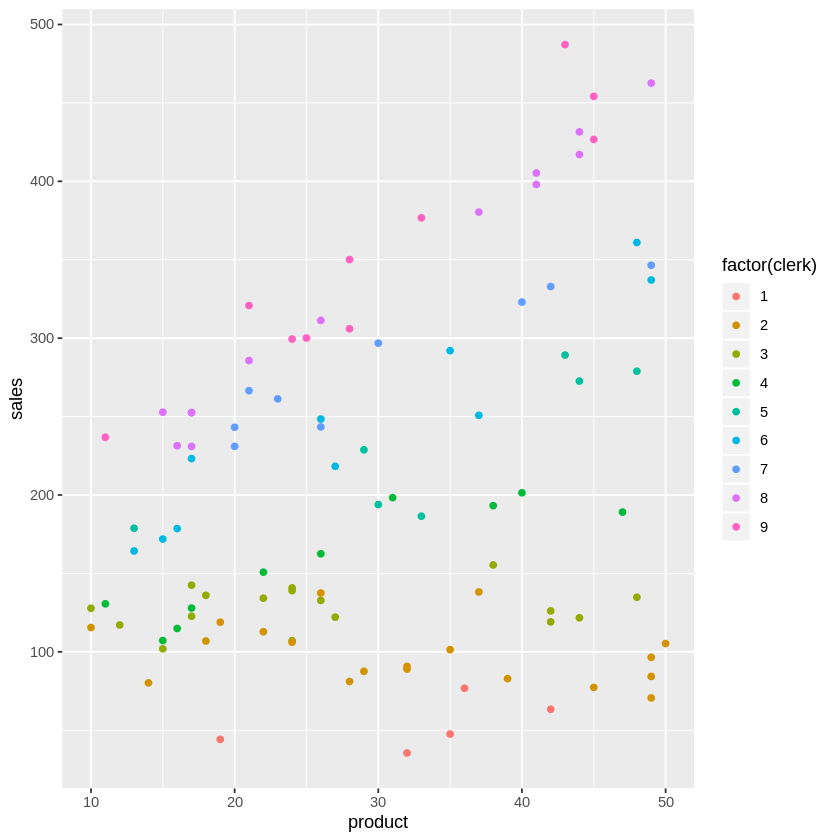

In [24]:
ggplot(data = interaction_3, aes(x = product, y = sales, color = factor(clerk))) + geom_point()

In [26]:
interaction_brms3 <- brm(
    formula = sales ~ product * clerk,
    family = gaussian(link = "identity"),
    data = interaction_3,
    seed = 1,
    prior = c(set_prior("", class = "Intercept"), set_prior("", class = "sigma"))
)
interaction_brms3

Compiling the C++ model
recompiling to avoid crashing R session
Start sampling


 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: sales ~ product * clerk 
   Data: interaction_3 (Number of observations: 100) 
Samples: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup samples = 4000

Population-Level Effects: 
              Estimate Est.Error l-95% CI u-95% CI Eff.Sample Rhat
Intercept        89.19     12.44    65.22   113.80       1501 1.00
product          -2.29      0.38    -3.05    -1.54       1490 1.00
clerk             6.29      2.30     1.71    10.78       1390 1.00
product:clerk     1.06      0.07     0.92     1.20       1408 1.00

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Eff.Sample Rhat
sigma    20.18      1.43    17.64    23.27       2800 1.00

Samples were drawn using sampling(NUTS). For each parameter, Eff.Sample 
is a crude measure of effective sample size, and Rhat is the potential 
scale reduction factor on split chains (at convergence, Rhat = 1).

In [27]:
int_conditions <- list(
    clerk = setNames(1:9, paste("clerk=", 1:9, sep = " "))
)

int_conditions

$clerk
clerk= 1 clerk= 2 clerk= 3 clerk= 4 clerk= 5 clerk= 6 clerk= 7 clerk= 8 
       1        2        3        4        5        6        7        8 
clerk= 9 
       9

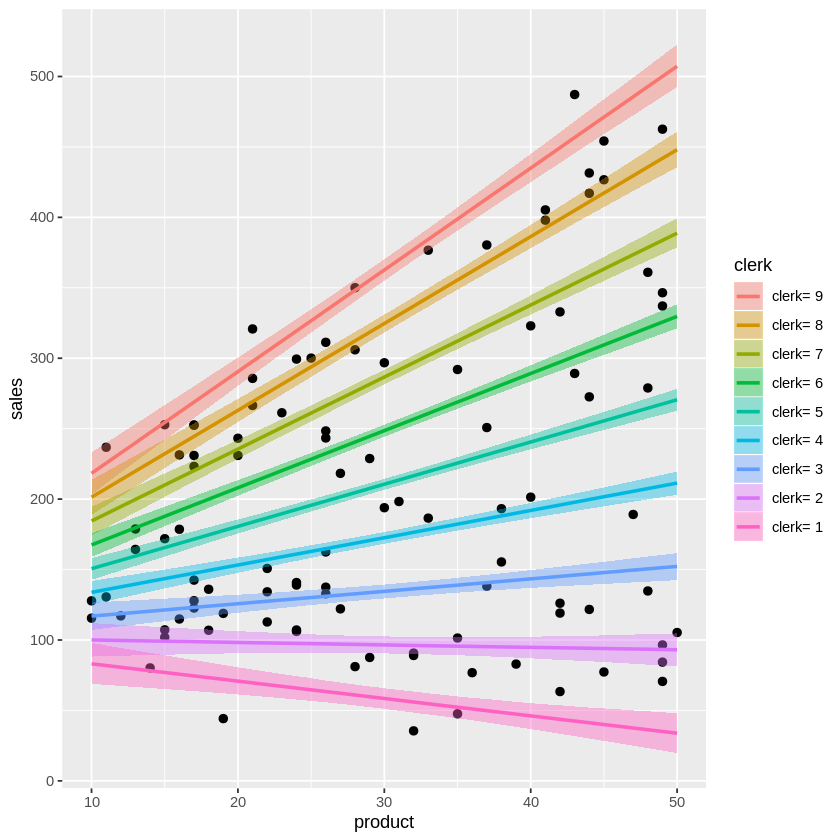

In [28]:
eff_3 <- marginal_effects(interaction_brms3, effects = "product:clerk", int_conditions = int_conditions)
plot(eff_3, points = TRUE)

In [29]:
conditions <- data.frame(clerk = 1:9)
conditions 

clerk
<int>
1
2
3
4
5
6
7
8
9


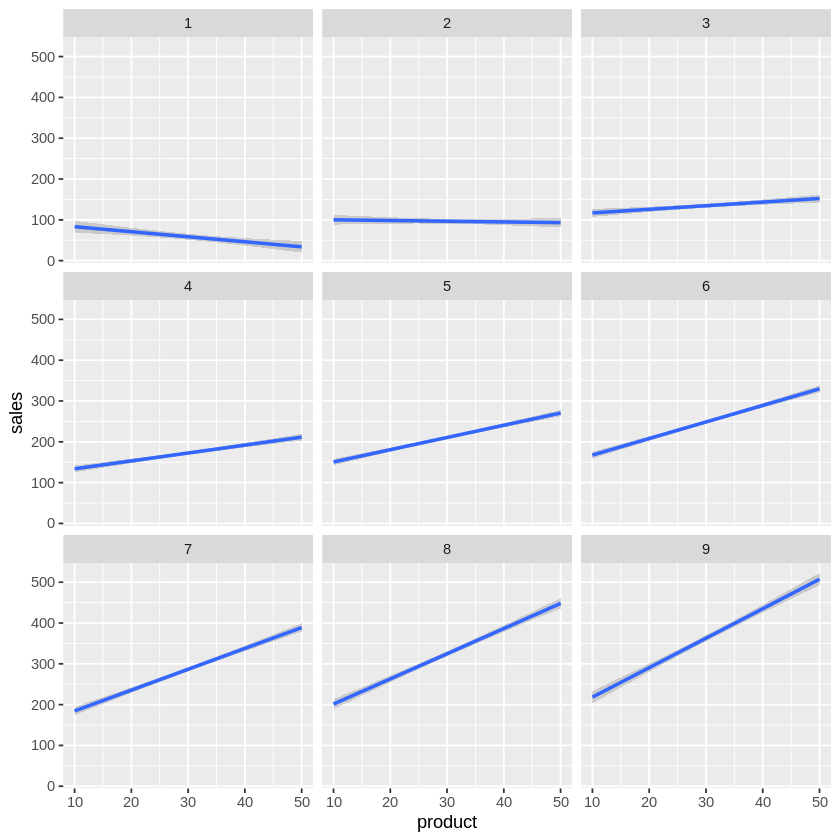

In [30]:
eff_4 <- marginal_effects(interaction_brms3, effects = "product", conditions = conditions)
plot(eff_4, points = FALSE)